In [130]:
#importamos librerias
import cv2 
import numpy as np
from matplotlib import pyplot as plt #usé matplotlib para mostrar las imagenes porque es mas facil de usar que cv2 en jupyter
from math import sqrt #para calcular los pesos

In [131]:
def isInTheList(elemento,arreglo):
    for i in arreglo:
        if np.array_equal(i,elemento):
            return True            
    return False  

#algoritmo de prim
def prim(grafo): #recibe el grafo formado por un diccionario de diccionarios
    visitados = [] #lista de nodos visitados
    arbol = [] #lista de aristas del arbol
    visitados.append(list(grafo.keys())[0]) #agregamos el primer nodo al arbol
    while len(visitados) < len(grafo): #mientras no hayamos visitado todos los nodos
        menor = 1000000 #inicializamos el peso de la arista menor en un numero muy grande 
        for i in visitados: #recorremos los nodos visitados 
            for j in grafo[i]: #recorremos los nodos adyacentes a el nodo visitado
                if j not in visitados and grafo[i][j] < menor: #si el nodo adyacente no ha sido visitado y su peso es menor al peso de la arista menor
                    menor = grafo[i][j] #actualizamos el peso de la arista menor
                    nodo1 = i #guardamos el nodo visitado
                    nodo2 = j #guardamos el nodo adyacente
        #iteramos hasta encontrar la arista menor
        visitados.append(nodo2) #agregamos el nodo adyacente a la lista de visitados
        arbol.append((nodo1, nodo2)) #agregamos la arista al arbol
    return arbol #retornamos el arbol

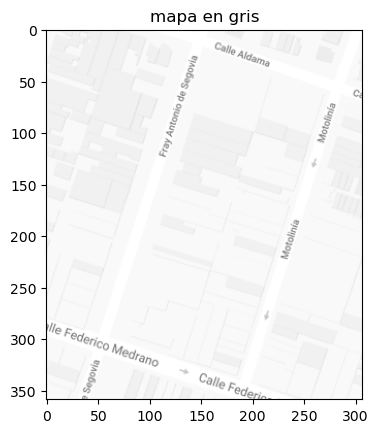

In [132]:
mapa=cv2.imread('mapa4.png')
gray = cv2.cvtColor(mapa,cv2.COLOR_BGR2GRAY)
plt_gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB) #cambiamos el orden de los canales para que matplotlib lo muestre correctamente
plt.imshow(plt_gray) #mostramos la imagen
plt.title('mapa en gris') #le ponemos titulo
plt.show() #mostramos la imagen

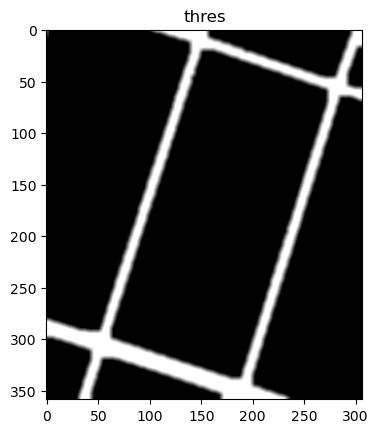

In [133]:
ret,th1 = cv2.threshold(gray,254,255,cv2.THRESH_BINARY)
kernel = np.ones((11,11), np.uint8) 
th1 = cv2.dilate(th1,kernel,1)
kernel = np.ones((11,11), np.uint8) 
th1 = cv2.erode(th1,kernel,1)
th1 = cv2.GaussianBlur(th1,(5,5),cv2.BORDER_DEFAULT) 
plt_th1 = cv2.cvtColor(th1, cv2.COLOR_BGR2RGB)
plt.imshow(plt_th1)
plt.title('thres')
plt.show()

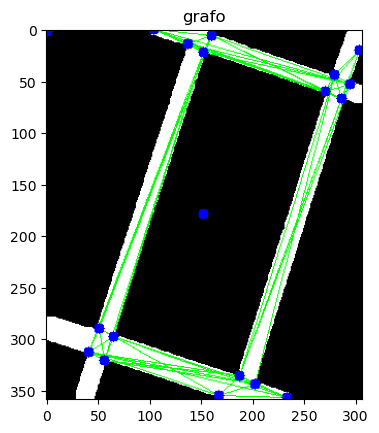

True

In [134]:
dst = cv2.cornerHarris(th1,2,3,0.05)
ret, dst = cv2.threshold(dst,0.04*dst.max(),255,0)
dst = np.uint8(dst)
ret,th2 = cv2.threshold(th1,235,255,cv2.THRESH_BINARY)
th2 = cv2.dilate(th2,kernel,1)
th2 = cv2.cvtColor(th2,cv2.COLOR_GRAY2BGR)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst,30, cv2.CV_32S)
vertices=np.int0(centroids)
    
aux1=vertices
aux2=vertices
verticesConectados=[]
aristas=[]

for h in range(len(aux1)):
    i=aux1[h]
    for k in range(h,len(aux2)):
        j=aux2[k]
        if not (i==j).all():
            x = np.linspace(i[0], j[0], 100).astype(int) #creamos un arreglo de 100 puntos en el eje x entre el punto i y el punto j
            y = np.linspace(i[1], j[1], 100).astype(int) #creamos un arreglo de 100 puntos en el eje y entre el punto i y el punto j
            midPoints = th2[y,x,:] #obtenemos los puntos de la imagen que estan en los puntos del arreglo
            if np.mean(midPoints)>250: #si el promedio de los puntos es mayor a 250, significa que no hay obstaculos entre los puntos i y j
                distancia = int(sqrt((i[0] - j[0])**2 + (i[1] - j[1])**2)) #calculamos la distancia entre los puntos i y j
                aristas.append((i,j,distancia)) #agregamos la arista al arreglo de aristas
                if not isInTheList(i,verticesConectados): #si el punto i no esta en el arreglo de vertices conectados
                    verticesConectados.append(i) #lo agregamos
                if not isInTheList(j,verticesConectados): #si el punto j no esta en el arreglo de vertices conectados
                    verticesConectados.append(j) #lo agregamos
                    
for arista in aristas:
    cv2.line(th2, tuple(arista[0]), tuple(arista[1]), (0,255,0), 1)
    
for point in vertices:
    cv2.circle(th2,(point[0], point[1]), 5, (255,0,0), -1)    
    cv2.waitKey(1)
        
plt_th2 = cv2.cvtColor(th2, cv2.COLOR_BGR2RGB)
plt.imshow(plt_th2)
plt.title('grafo')
plt.show()
cv2.imwrite('grafo4.png',th2) #guardamos la imagen del grafo

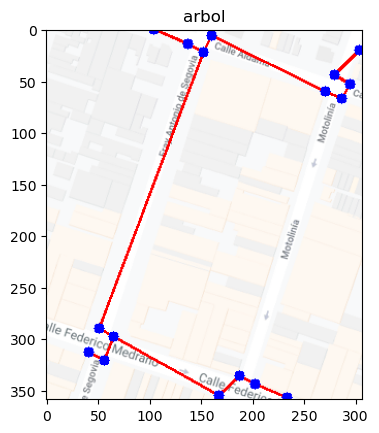

True

In [135]:
grafo = {}  #creamos un diccionario para guardar el grafo

for i in verticesConectados: #recorremos los vertices conectados y los agregamos al diccionario como claves
    grafo[tuple(i)] = {} #agregamos el vertice como clave al diccionario y creamos un diccionario vacio como valor (guardaremos las aristas en este diccionario)

for arista in aristas: #recorremos las aristas
    grafo[tuple(arista[0])][tuple(arista[1])] = arista[2]  #agregamos la arista al diccionario de aristas del vertice de origen con el peso de la arista
    grafo[tuple(arista[1])][tuple(arista[0])] = arista[2] #agregamos la arista al diccionario de aristas del vertice de destino con el peso de la arista

arbol = prim(grafo) #aplicamos el algoritmo de prim al grafo

for arista in arbol:
    cv2.line(mapa, tuple(arista[0]), tuple(arista[1]), (0,0,255), 2) #dibujamos las aristas del arbol en la imagen del mapa

for point in verticesConectados:
    cv2.circle(mapa,(point[0], point[1]), 5, (255,0,0), -1)  #dibujamos los vertices en la imagen del mapa
    cv2.waitKey(1)

plt_mapa = cv2.cvtColor(mapa, cv2.COLOR_BGR2RGB)
plt.imshow(plt_mapa)
plt.title('arbol')
plt.show()
cv2.imwrite('arbol4.png',mapa) #guardamos la imagen del arbol